## Decision Tree

In [3]:
import pandas as pd
df = pd.read_csv('csv/DecisionTreeDataset -Num.csv')
df.head()

,CGPA,Communication,Apptitude,Programming Skill,Job Offered
0,2,1,1,1,1
1,1,1,1,1,1
2,0,0,0,1,0
3,0,1,0,0,0
4,2,1,1,0,1


In [6]:
import numpy as np
df['CGPA'] = np.where(df['CGPA']==2, 'High', np.where(df['CGPA']==1,'Medium', 'Low'))
df.head()

,CGPA,Communication,Apptitude,Programming Skill,Job Offered
0,High,1,1,1,1
1,Medium,1,1,1,1
2,Low,0,0,1,0
3,Low,1,0,0,0
4,High,1,1,0,1


In [7]:
df['Communication'] = np.where(df['Communication']==1, 'Good', 'Bad')
df.head()

,CGPA,Communication,Apptitude,Programming Skill,Job Offered
0,High,Good,1,1,1
1,Medium,Good,1,1,1
2,Low,Bad,0,1,0
3,Low,Good,0,0,0
4,High,Good,1,0,1


In [8]:
df['Apptitude'] = np.where(df['Apptitude']==1, 'High', 'Low')
df.head()

,CGPA,Communication,Apptitude,Programming Skill,Job Offered
0,High,Good,High,1,1
1,Medium,Good,High,1,1
2,Low,Bad,Low,1,0
3,Low,Good,Low,0,0
4,High,Good,High,0,1


In [9]:
df['Programming Skill'] = np.where(df['Programming Skill']==1, 'Good', 'Bad')
df.head()

,CGPA,Communication,Apptitude,Programming Skill,Job Offered
0,High,Good,High,Good,1
1,Medium,Good,High,Good,1
2,Low,Bad,Low,Good,0
3,Low,Good,Low,Bad,0
4,High,Good,High,Bad,1


In [10]:
df['Job Offered'] = np.where(df['Job Offered']==1, 'Yes', 'No')
df.head()

,CGPA,Communication,Apptitude,Programming Skill,Job Offered
0,High,Good,High,Good,Yes
1,Medium,Good,High,Good,Yes
2,Low,Bad,Low,Good,No
3,Low,Good,Low,Bad,No
4,High,Good,High,Bad,Yes


In [11]:
df.to_csv('ChangedDecisionTreeDataset -Num.csv')

## DecisionTree_Sports.csv

In [15]:
import pandas as pd
df = pd.read_csv('csv/DecisionTree_Sports.csv')
df

,Day,Weather,Temperature,Humidity,Wind,Play_Sports?
0,Day 1,Sunny,Hot,High,Weak,No
1,Day 2,Sunny,Hot,High,Strong,No
2,Day 3,Cloudy,Hot,High,Weak,Yes
3,Day 4,Rain,Mild,High,Weak,Yes
4,Day 5,Rain,Cool,Normal,Weak,Yes
5,Day 6,Rain,Cool,Normal,Strong,No
6,Day 7,Cloudy,Cool,Normal,Strong,Yes
7,Day 8,Sunny,Mild,High,Weak,No
8,Day 9,Sunny,Cool,Normal,Weak,Yes
9,Day 10,Rain,Mild,Normal,Weak,Yes


In [18]:
import pandas as pd
df = pd.read_csv('csv/DecisionTreeDataset -Num.csv')
df

,CGPA,Communication,Apptitude,Programming Skill,Job Offered
0,2,1,1,1,1
1,1,1,1,1,1
2,0,0,0,1,0
3,0,1,0,0,0
4,2,1,1,0,1
5,2,1,1,1,1
6,1,0,0,0,0
7,1,0,0,1,0
8,2,0,1,1,1
9,1,1,1,1,1


In [19]:
x = df.drop('Job Offered', axis=1)
y = df['Job Offered']
print(x.shape, y.shape)

(18, 4) (18,)


In [34]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy')  # max_depth=2 gives the depth till the desire number.
model = dtc.fit(x, y)
dtc.get_depth()  # gets the depth of the leaf node.

3

In [35]:
y_pred = model.predict(x)
y_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [36]:
dataset = pd.DataFrame({'y':y, 'y_pred':y_pred})
dataset

,y,y_pred
0,1,1
1,1,1
2,0,0
3,0,0
4,1,1
5,1,1
6,0,0
7,0,0
8,1,1
9,1,1


In [37]:
from sklearn import tree
features = list(x.columns)
text_representation = tree.export_text(dtc, feature_names = features)
print(text_representation)

|--- Apptitude <= 0.50
|   |--- class: 0
|--- Apptitude >  0.50
|   |--- Communication <= 0.50
|   |   |--- CGPA <= 1.50
|   |   |   |--- class: 0
|   |   |--- CGPA >  1.50
|   |   |   |--- class: 1
|   |--- Communication >  0.50
|   |   |--- class: 1



In [40]:
from sklearn import metrics as m
cm = m.confusion_matrix(y, y_pred)
cm

array([[10,  0],
       [ 0,  8]], dtype=int64)

In [41]:
print(f'Accuracy: {m.accuracy_score(y, y_pred)}')
print(f'Sensitivity: {m.recall_score(y, y_pred, pos_label=1)}')
print(f'Specificity: {m.recall_score(y, y_pred, pos_label=0)}')

Accuracy: 1.0
Sensitivity: 1.0
Specificity: 1.0


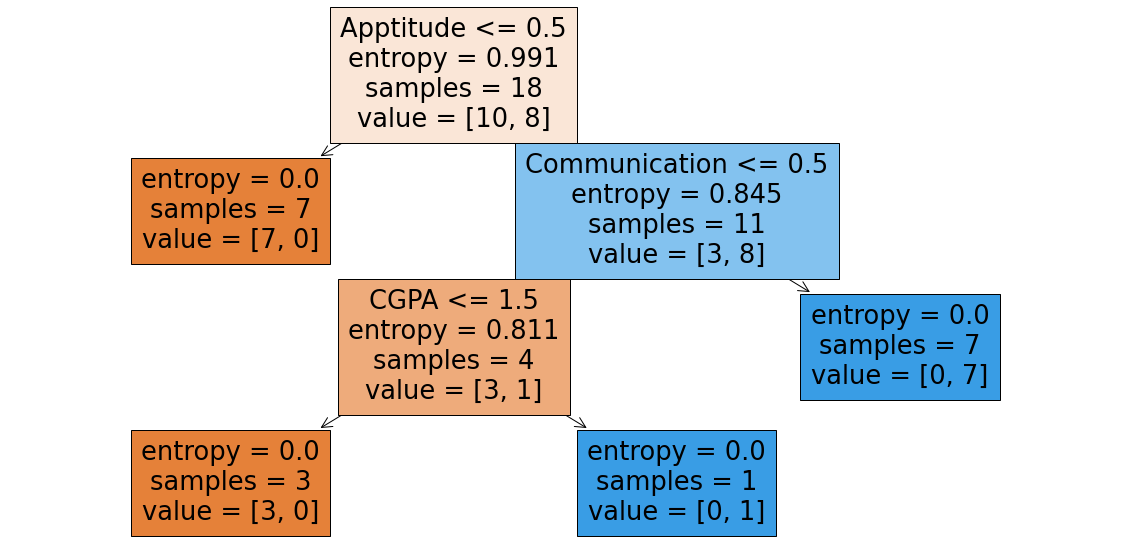

In [42]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (20, 10))
plot_tree(dtc, feature_names = features, filled=True)
plt.show()

In [32]:
import pandas as pd
df = pd.read_csv('csv/DecisionTree_Sports.csv')
df

,Day,Weather,Temperature,Humidity,Wind,Play_Sports?
0,Day 1,Sunny,Hot,High,Weak,No
1,Day 2,Sunny,Hot,High,Strong,No
2,Day 3,Cloudy,Hot,High,Weak,Yes
3,Day 4,Rain,Mild,High,Weak,Yes
4,Day 5,Rain,Cool,Normal,Weak,Yes
5,Day 6,Rain,Cool,Normal,Strong,No
6,Day 7,Cloudy,Cool,Normal,Strong,Yes
7,Day 8,Sunny,Mild,High,Weak,No
8,Day 9,Sunny,Cool,Normal,Weak,Yes
9,Day 10,Rain,Mild,Normal,Weak,Yes


In [33]:
import numpy as np
df['Weather'] = np.where(df['Weather']=='Sunny', 2,(np.where(df['Weather']=='Cloudy', 1, 0)))
df['Temperature'] = np.where(df['Temperature']=='Hot', 2,(np.where(df['Temperature']=='Mild', 1, 0)))
df['Humidity'] = np.where(df['Humidity']=='High', 1, 0)
df['Wind'] = np.where(df['Wind']=='Strong', 1, 0)
df['Play_Sports?'] = np.where(df['Play_Sports?']=='Yes', 1, 0)
df

,Day,Weather,Temperature,Humidity,Wind,Play_Sports?
0,Day 1,2,2,1,0,0
1,Day 2,2,2,1,1,0
2,Day 3,1,2,1,0,1
3,Day 4,0,1,1,0,1
4,Day 5,0,0,0,0,1
5,Day 6,0,0,0,1,0
6,Day 7,1,0,0,1,1
7,Day 8,2,1,1,0,0
8,Day 9,2,0,0,0,1
9,Day 10,0,1,0,0,1


In [34]:
x = df.drop(columns = ['Day', 'Play_Sports?'], axis=1)
y = df['Play_Sports?']
print(x.shape, y.shape)

(14, 4) (14,)


In [35]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy')
model = dtc.fit(x,y)
dtc.get_depth()

4

In [36]:
y_pred = model.predict(x)
y_pred

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [37]:
from sklearn import tree
features = list(x.columns)
text_representation = tree.export_text(dtc, feature_names = features)
print(text_representation)

|--- Humidity <= 0.50
|   |--- Wind <= 0.50
|   |   |--- class: 1
|   |--- Wind >  0.50
|   |   |--- Weather <= 0.50
|   |   |   |--- class: 0
|   |   |--- Weather >  0.50
|   |   |   |--- class: 1
|--- Humidity >  0.50
|   |--- Weather <= 1.50
|   |   |--- Wind <= 0.50
|   |   |   |--- class: 1
|   |   |--- Wind >  0.50
|   |   |   |--- Weather <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Weather >  0.50
|   |   |   |   |--- class: 1
|   |--- Weather >  1.50
|   |   |--- class: 0



In [38]:
from sklearn import metrics as m
cm = m.confusion_matrix(y, y_pred)
cm

array([[5, 0],
       [0, 9]], dtype=int64)

In [39]:
print(f'Accuracy: {m.accuracy_score(y, y_pred)}')
print(f'Sensitivity: {m.recall_score(y, y_pred, pos_label=1)}')
print(f'Specificity: {m.recall_score(y, y_pred, pos_label=0)}')

Accuracy: 1.0
Sensitivity: 1.0
Specificity: 1.0


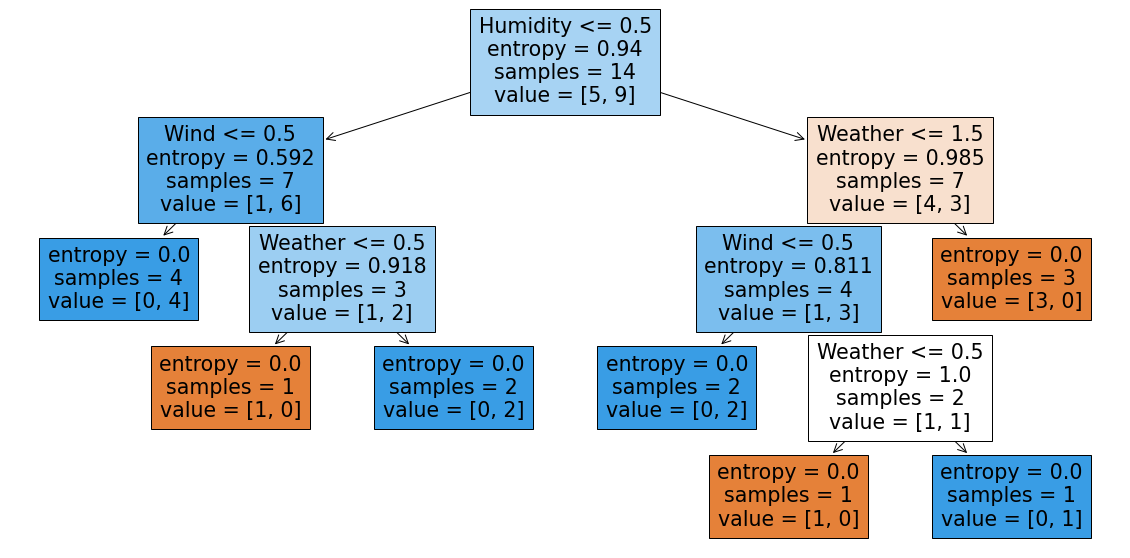

In [40]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (20, 10))
plot_tree(dtc, feature_names = features, filled=True)
plt.show()

,Day,Weather,Temperature,Humidity,Wind,Play_Sports?
0,Day 1,2,2,1,0,0
1,Day 2,2,2,1,1,0
2,Day 3,1,2,1,0,1
3,Day 4,0,1,1,0,1
4,Day 5,0,0,0,0,1
5,Day 6,0,0,0,1,0
6,Day 7,1,0,0,1,1
7,Day 8,2,1,1,0,0
8,Day 9,2,0,0,0,1
9,Day 10,0,1,0,0,1


# diabetes.csv

In [42]:
import pandas as pd
import numpy as np
df = pd.read_csv('csv/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
y = df['Outcome']
x = df.drop('Outcome', axis=1)
print(x.shape, y.shape)

(768, 8) (768,)


In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(614, 8) (154, 8)
(614,) (154,)


In [47]:
from sklearn.tree import DecisionTreeClassifier, export_text
dtc = DecisionTreeClassifier(criterion='entropy')
model = dtc.fit(x_train, y_train)
dtc.get_depth()
y_pred = model.predict(x_test)

In [48]:
dataset = pd.DataFrame({'y':y_test, 'y_pred': y_pred})
dataset

,y,y_pred
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
...,...,...
355,1,1
534,0,0
344,0,1
296,1,1


In [52]:
features = list(x.columns)
text_representation = export_text(dtc, feature_names= features)
text_representation

'|--- Glucose <= 127.50\n|   |--- Age <= 28.50\n|   |   |--- BMI <= 30.95\n|   |   |   |--- DiabetesPedigreeFunction <= 0.67\n|   |   |   |   |--- class: 0\n|   |   |   |--- DiabetesPedigreeFunction >  0.67\n|   |   |   |   |--- DiabetesPedigreeFunction <= 0.69\n|   |   |   |   |   |--- class: 1\n|   |   |   |   |--- DiabetesPedigreeFunction >  0.69\n|   |   |   |   |   |--- class: 0\n|   |   |--- BMI >  30.95\n|   |   |   |--- BloodPressure <= 37.00\n|   |   |   |   |--- class: 1\n|   |   |   |--- BloodPressure >  37.00\n|   |   |   |   |--- DiabetesPedigreeFunction <= 0.50\n|   |   |   |   |   |--- SkinThickness <= 8.50\n|   |   |   |   |   |   |--- Glucose <= 109.50\n|   |   |   |   |   |   |   |--- class: 0\n|   |   |   |   |   |   |--- Glucose >  109.50\n|   |   |   |   |   |   |   |--- Glucose <= 123.00\n|   |   |   |   |   |   |   |   |--- class: 1\n|   |   |   |   |   |   |   |--- Glucose >  123.00\n|   |   |   |   |   |   |   |   |--- class: 0\n|   |   |   |   |   |--- SkinThi

In [54]:
from sklearn import metrics as m
cm = m.confusion_matrix(y_test, y_pred)
cm

array([[77, 22],
       [16, 39]], dtype=int64)

In [56]:
print(f'Accuracy: {m.accuracy_score(y_test, y_pred)}')
print(f'Sensitivity: {m.recall_score(y_test, y_pred, pos_label=1)}')
print(f'Specificity: {m.recall_score(y_test, y_pred, pos_label=0)}')

Accuracy: 0.7532467532467533
Sensitivity: 0.7090909090909091
Specificity: 0.7777777777777778


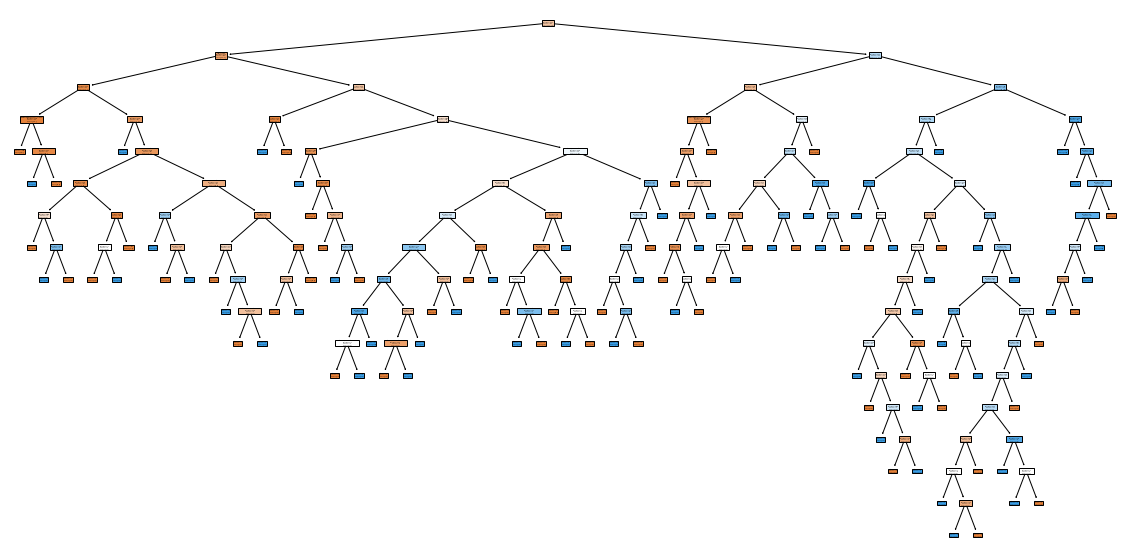

In [57]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (20, 10))
plot_tree(dtc, feature_names = features, filled=True)
plt.show()